In [37]:
import yfinance as yf
from datetime import date
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [38]:
stock = ["TSLA"]
df = yf.download(stock)

[*********************100%***********************]  1 of 1 completed


In [39]:
df['Log'] = np.log(df['Close'])
df['Returns'] = df['Log'].pct_change()
df['Range'] = (df['High'] / df['Low']) - 1
df.dropna(inplace=True)
data = df[['Returns', 'Range']]

In [40]:
model = hmm.GaussianHMM(n_components=3, covariance_type='full')
model.fit(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(covariance_type='full', n_components=3)

In [41]:
model.score(data)

16161.498996021772

In [42]:
states = model.predict(data)

<AxesSubplot: >

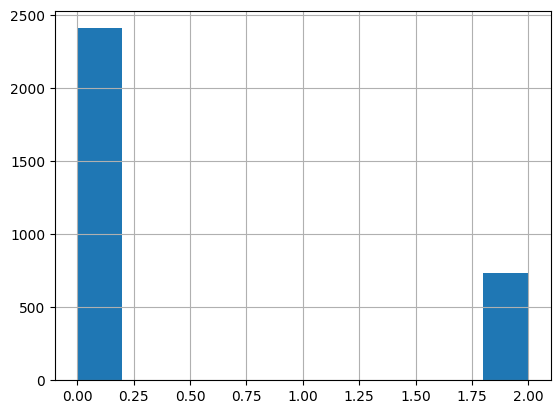

In [43]:
pd.Series(states).hist()

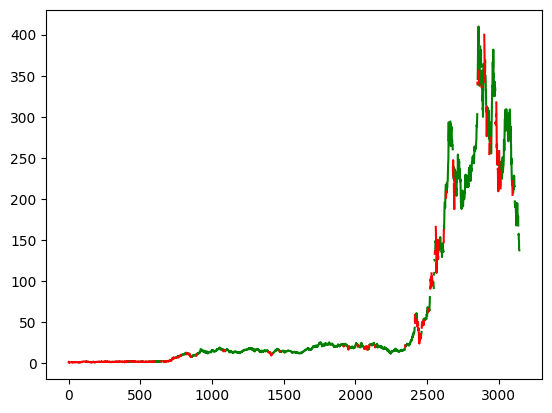

In [44]:
state1,state2,state3 = [],[],[]
i = 0
for state in states:
  if state == 0:
    state1.append(df['Close'][i])
    state2.append(float('nan'))
    state3.append(float('nan'))
  if state == 1:
    state2.append(df['Close'][i])
    state1.append(float('nan'))
    state3.append(float('nan'))
  if state == 2:
    state3.append(df['Close'][i])
    state2.append(float('nan'))
    state1.append(float('nan'))
  i += 1
plt.plot(state1,color='green')
plt.plot(state2,color='yellow')
plt.plot(state3,color='red')